In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import os
import random

In [ ]:
#mount to google drive to access csv located in my google drive
drive.mount('/content/drive/')
#os.getcwd()
os.chdir('drive/MyDrive/GradSchool/CHEM_269/Act1')#

Mounted at /content/drive/


In [ ]:
# Load the data and preview it
df = pd.read_excel('../Act0/Guess_Who_Features.xlsx')
df.set_index('Feature', inplace=True)
df.head(5)
#print(df.shape)

,Adrian_Jinich,Nate_Roethler,Rocky,Nate,Julia,Derek,Ariel,Sierra,Christie,Karry,...,Shirley,Megha,Felipe,Aaryan,Mayuna,Joshua R,Thompson,Miranda,Diana,Caxton
Feature,,,,,,,,,,,,,,,,,,,,,
wears glasses,1,0,0,NaN,0,0,0,0,0,1,...,1,0,1,1,1.0,1,1,1,0,0
runs for exercise,0,0,1,NaN,1,0,0,1,1,0,...,0,1,0,0,1.0,1,0,0,1,0
number of siblings,1,2,1,NaN,2,2,2,5,3,0,...,1,1,2,1,NaN,9,2,1,4,0
likes ice cream,1,1,1,NaN,1,0,1,1,1,1,...,1,1,1,1,NaN,1,1,1,1,1
brown eyes,1,1,1,NaN,1,1,1,0,1,0,...,1,1,1,1,NaN,0,1,1,1,0


In [ ]:
#transpose the dataframe so i can more easily access the names
df_transposed = df.transpose()
#make a list of students and print it
students = list(df_transposed.index)
print(students)
#choose random name and print it
random_name = random.choice(students)
print(random_name)

#prints a list of all the features
features = df.index.tolist()
print(features)

['Adrian_Jinich', 'Nate_Roethler', 'Rocky', 'Nate', 'Julia', 'Derek', 'Ariel', 'Sierra', 'Christie', 'Karry', 'Katharine', 'Josh', 'Ryan', 'Nathan', 'Abhijit', 'Josh Lim', 'Shivali', 'Luka', 'Mohit', 'Luis', 'Demi', 'Clare', 'Javier', 'Santino', 'Anna', 'Shay', 'Tristan', 'Sarah', 'Davis', 'Czar', 'Francisco', 'Audrey', 'Colleen', 'Nick', 'Jesse', 'Sarah Lin', 'Jazlyn', 'Amy', 'Doug', 'Andrea', 'Esther', 'Zoe', 'Merchel', 'Woojung', 'Srikar', 'Ali', 'Nivhi', 'Daniel', 'Eugene', 'Soumya', 'Alma', 'Leyi', 'Jiaqi', 'Adesh', 'Juan', 'Shirley', 'Megha', 'Felipe', 'Aaryan', 'Mayuna', 'Joshua R', 'Thompson', 'Miranda', 'Diana', 'Caxton']
Francisco
['wears glasses', 'runs for exercise', 'number of siblings', 'likes ice cream', 'brown eyes', 'undergraduate student', 'graduate student', 'has seen The New Dog Man Movie', "less than 6'", 'has a mac laptop', 'introvert', 'can catch very well?', 'can throw very well?', 'likes to swim', 'watched Wicked', 'Long Hair', 'Snowboards', 'Likes Working on C

In [ ]:
#before transposing, want to remove columns missing any values
df = df.dropna(axis=1, how='any')
#taking original dataframe, transpose by making the names the first column and the features into the row headers aka each feature is a column
df_transposed = df.transpose()
df_transposed.shape # 60 people, 68 feature cols


(60, 68)

In [ ]:
#remove vectors(people) with any emtpy values, this removed 5 columns (5 people)
df_no_nan = df.dropna(axis=1, how='any')
df.shape, df_no_nan.shape #dropping nan columns removed 5 people

((68, 60), (68, 60))

In [ ]:
#pandas assigned every value as datatype 'object', meaning it imported everything as a string
#change all non-categorical columns to be stored as int64 (a number)
df_T_numerical = df_transposed.apply(pd.to_numeric, errors='ignore')
df_T_numerical.dtypes #output now shows that everything but the strings are stored as numbers

<ipython-input-7-b14c5ed74862>:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_T_numerical = df_transposed.apply(pd.to_numeric, errors='ignore')


,0
Feature,
wears glasses,int64
runs for exercise,int64
number of siblings,int64
likes ice cream,int64
brown eyes,int64
...,...
wants to work in industry,object
number of types of pets owned?,int64
tolerance to sweetness (1-5),int64


In [ ]:
#find binary columns

binary_cols = df_T_numerical.columns[
    (df_T_numerical.nunique() == 2)
    & df_T_numerical.isin([0, 1]).all()]
#keep only binary columns - this will be dataframe to use for the game
df_binary = df_T_numerical[binary_cols]
df_binary.head() #now only have 55 columns because only binary were kept

#print(df_binary.loc[0,:])

Feature,wears glasses,runs for exercise,likes ice cream,brown eyes,undergraduate student,graduate student,less than 6',has a mac laptop,introvert,can catch very well?,...,enjoys spicy food,plays guitar,plays piano,wine expert,certified phlebotomist,straight hair,international?,is left handed?,has never dyed hair,has been in the military
Adrian_Jinich,1,0,1,1,0,0,0,0,1,1,...,1,1,1,0,0,1,1,0,1,0
Nate_Roethler,0,0,1,1,0,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
Rocky,0,1,1,1,0,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
Julia,0,1,1,1,1,0,1,1,1,1,...,1,1,1,0,0,1,0,0,1,0
Derek,0,0,0,1,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,1,0


# [EXERCISE 0]
### Calculate the cosine distance between two vectors

In [ ]:
def cosine_distance(vector1, vector2):
  # convert vectors into arrays
  vector1_array = np.array(vector1)
  vector2_array = np.array(vector2)

  #calculate the dot product and magnitudes of the vectors
  dot_product = np.dot(vector1, vector2)
  magnitude1 = np.linalg.norm(vector1)
  magnitude2 = np.linalg.norm(vector2)

  #calculate if magnitudes are not zero to avoid division by zero
  if magnitude1 == 0 or magnitude2 == 0:
      raise ValueError("One or both of the vectors are zero vectors, cosine distance is undefined.")

  #calculate cosine similarity
  cosine_similarity = dot_product / (magnitude1 * magnitude2)

  # calculate cosine distance
  cosine_distance = 1 - cosine_similarity

  return cosine_distance


In [ ]:
#find my own vector as np array
vector = np.array(df_binary.loc['Clare'])
vector.dtype

dtype('int64')

In [ ]:
#Two vectors to find distance bewtween
Me = np.array(df_binary.loc['Clare'])
Other = df_binary.loc['Alma']

### Find the person(s) whose vector is most similar to yours according to this metric.


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


def find_most_similar_person(df, person_name):
    """
    Finds the person(s) most similar to the given person based on cosine similarity.

    Parameters:
    - df: DataFrame with people as columns and features as rows.
    - person_name: The name (column) of the person to compare.

    Returns:
    - A dictionary with the most similar person(s) and their cosine similarity score.
    """
    # Extract the vector of the target person
    target_vector = df.loc[person_name].values.reshape(1, -1)

    # Compute cosine similarities between the target person and all others
    similarities = cosine_similarity(df, target_vector).flatten()

    # Create a Series of similarities, excluding the target person
    similarities_series = pd.Series(similarities, index=df.index)
    similarities_series = similarities_series.drop(person_name)

    # Find the maximum similarity
    max_similarity = similarities_series.max()
    most_similar_people = similarities_series[similarities_series == max_similarity].index.tolist()

    # Return the results
    return {
        "most_similar_people": most_similar_people,
        "similarity_score": max_similarity
    }


In [ ]:
#Find most similar person and print results
result = find_most_similar_person(df_binary, 'Clare')

print(f"Most similar person(s) to Clare: {result['most_similar_people']}")
print(f"Cosine similarity score: {result['similarity_score']}")

Most similar person(s) to Clare: ['Colleen', 'Amy']
Cosine similarity score: 0.7519206177414045


# [EXERCISE 1] Reduce the data with PCA and visualize the results

In [ ]:
from sklearn.decomposition import PCA


def plot_2d_projection(df):
    """
    Reduces the dimensionality of the DataFrame to 2D using PCA and plots the result.

    Parameters:
    - df: DataFrame where each column represents a person and rows are their features.

    Returns:
    - A scatter plot of the 2D projection of person-vectors.
    """

    # Apply PCA to reduce to 2 dimensions
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df)  # Resulting shape: (number_of_people, 2)

    # Create a scatter plot
    plt.figure(figsize=(10, 7))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, color="blue")

    # Annotate the points with person names
    for i, name in enumerate(df.index):
        plt.text(pca_result[i, 0], pca_result[i, 1], name, fontsize=9, ha='right')

    # Set plot labels and title
    plt.title("2D PCA Projection of Person-Vectors", fontsize=14)
    plt.xlabel("Principal Component 1", fontsize=12)
    plt.ylabel("Principal Component 2", fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()


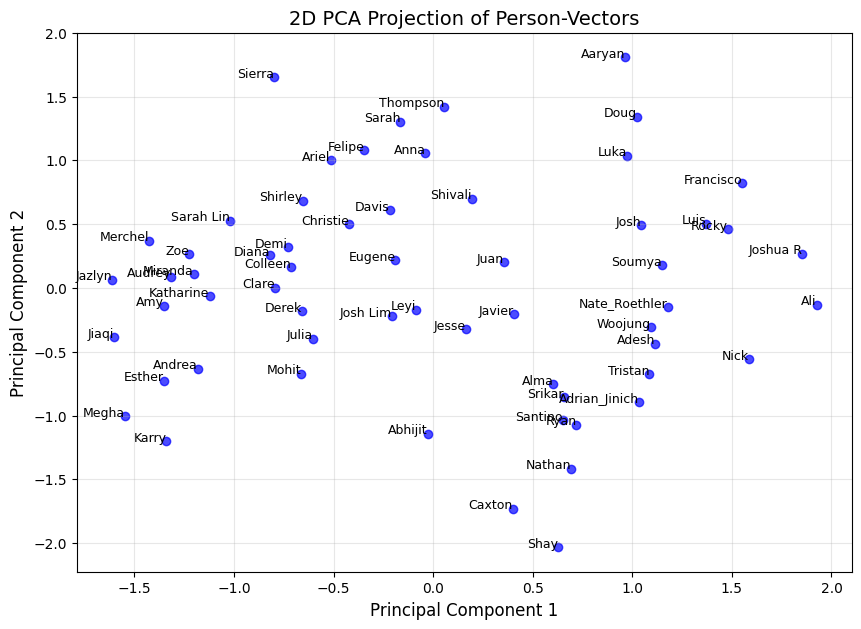

In [ ]:
#2D projection of all data in prinipal component space
plot_2d_projection(df_binary)


### [EXERCISE 2] Make an interactive 2D projection

In [ ]:
plot_interactive_2d_projection(df_binary)

NameError: name 'plot_interactive_2d_projection' is not defined

## [EXERCISE 3] Becoming familiar with Uniprot: Download TSV of organism proteome

In [ ]:
# Load the data and preview it
df = pd.read_excel('P_cepacia.xlsx')

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


## [EXERCISE 4] proteome summary statistics

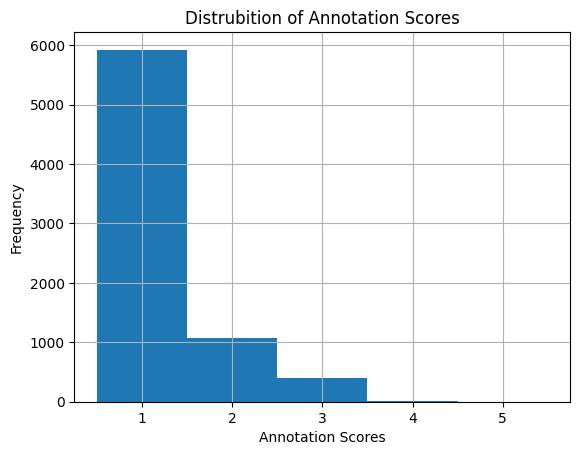

In [ ]:
#define bin edges so that the histogram bar is centered on integer
bin_edges = np.array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

df.loc[:,'Annotation'].hist(bins = bin_edges)

plt.xlabel('Annotation Scores')
plt.ylabel('Frequency')
plt.title('Distrubition of Annotation Scores')
plt.show()

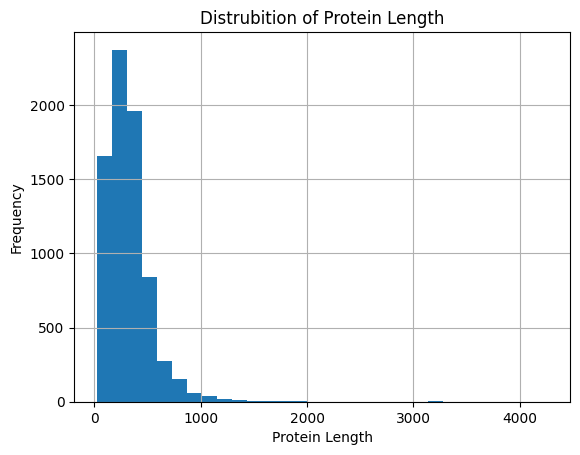

In [ ]:
#histogram of protein length with 30 bins
df.loc[:,'Length'].hist(bins = 30)

plt.xlabel('Protein Length')
plt.ylabel('Frequency')
plt.title('Distrubition of Protein Length')
plt.show()

In [ ]:
#summary statistics for protein length
df.loc[:,'Length'].describe()

,Length
count,7408.000000
mean,322.374865
std,216.086218
min,24.000000
25%,179.000000
50%,292.000000
75%,406.000000
max,4265.000000


In [ ]:
#summary statistics for annotation score
df.loc[:,'Annotation'].describe()

,Annotation
count,7408.000000
mean,1.258639
std,0.559471
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


## [EXERCISE 5] Find number of cysteines in each protein!!

In [ ]:
# find all C's in each protein sequence, count them, and append that number to a new column
df['num_cysteines'] = df['Sequence'].apply(lambda seq: seq.count('C'))
df.head(5)

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Mass,Sequence,Function [CC],Temperature dependence,Redox potential,Annotation,num_cysteines
0,A0A081VA81,unreviewed,A0A081VA81_BURCE,Pyrimidine/purine nucleoside phosphorylase (EC...,ppnP C5615_25855 DM43_711 E3D37_35325 VL15_384...,Burkholderia cepacia (Pseudomonas cepacia),106,11608,MTSATQFDNVSVVKRANVYFDGKCVSHTVLFPDGTRKTLGVILPCA...,FUNCTION: Catalyzes the phosphorolysis of dive...,NaN,NaN,4.0,4
1,A0A081VC64,unreviewed,A0A081VC64_BURCE,dITP/XTP pyrophosphatase (EC 3.6.1.66) (Non-ca...,rdgB E3D37_14645 WS90_23575 WT26_08280,Burkholderia cepacia (Pseudomonas cepacia),208,22469,MPDDHTIAPLSRIVLASNNAGKLREFTALFSTVGIEIVPQGDLAVP...,FUNCTION: Pyrophosphatase that catalyzes the h...,NaN,NaN,4.0,3
2,A0A095DU18,unreviewed,A0A095DU18_BURCE,Dual-specificity RNA methyltransferase RlmN (E...,rlmN WS90_13195 WT26_12750,Burkholderia cepacia (Pseudomonas cepacia),379,41352,MTSETSVNLLDFDAEGLVAYCGSLGEKPFRAKQLQRWIHQYNAGDF...,FUNCTION: Specifically methylates position 2 o...,NaN,NaN,4.0,9
3,A0A102R9D1,unreviewed,A0A102R9D1_BURCE,CTP synthase (EC 6.3.4.2) (Cytidine 5'-triphos...,pyrG E3D37_10460 JAO13_14350 NCTC10661_05975 W...,Burkholderia cepacia (Pseudomonas cepacia),552,61258,MTKYVFVTGGVVSSLGKGIAAASLAAILESRGLKVTLLKLDPYINV...,FUNCTION: Catalyzes the ATP-dependent aminatio...,NaN,NaN,4.0,6
4,A0A102UKT2,unreviewed,A0A102UKT2_BURCE,Serine hydroxymethyltransferase (SHMT) (Serine...,glyA glyA_1 JAO13_31285 NCTC10661_04756 WS90_1...,Burkholderia cepacia (Pseudomonas cepacia),424,45467,MSNTQPFFSQSLAERDAPVRSAILKELERQQSQVELIASENIVSRA...,FUNCTION: Catalyzes the reversible interconver...,NaN,NaN,4.0,3


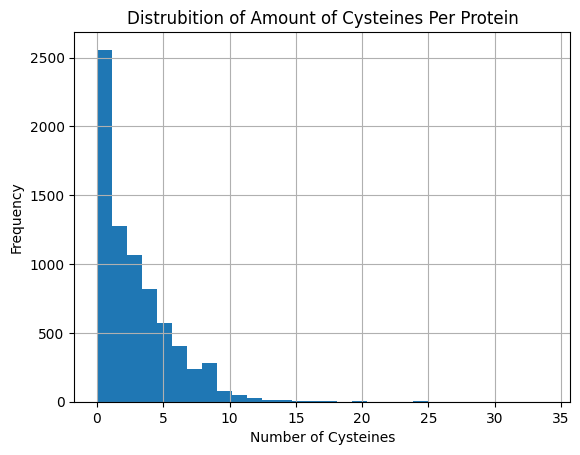

In [ ]:
#plot distribution of number of cysteines per protein
df.loc[:,'num_cysteines'].hist(bins = 30)

plt.xlabel('Number of Cysteines')
plt.ylabel('Frequency')
plt.title('Distrubition of Amount of Cysteines Per Protein')
plt.show()

In [ ]:
import h5py
import gzip
import shutil
import numpy as np
import io

In [ ]:
file_name = "P_cepacia_embedding.gz"
#Function to load my compressed proteome embedding
def load_compressed_h5_to_dict(file_name):
    with gzip.open(file_name, 'rb') as f:
        with h5py.File(io.BytesIO(f.read()), 'r') as h5f:
            data_dict = {key: np.array(h5f[key]) for key in h5f.keys()}
    return data_dict


#print the first 5 to check
print(f"Loaded {len(proteome_dict)} proteins.")
for key, value in list(proteome_dict.items())[:10]:
    print(f"{key}: {value}")

#similarity_results = cosine_similarity_to_others(proteome_dict)
#print(similarity_results)


Loaded 36979 proteins.
A0A075W271: [ 0.01491  -0.065     0.03235  ... -0.003866  0.0632    0.06665 ]
A0A075W278: [ 0.01344  -0.06384   0.03445  ... -0.005455  0.066     0.0671  ]
A0A075W2G0: [ 0.02136   0.02278   0.06555  ... -0.0372   -0.001814  0.00785 ]
A0A075W2V0: [ 0.1131    0.1816   -0.032    ... -0.013565 -0.05005   0.05304 ]
A0A075W2V7: [ 0.11     0.18    -0.03354 ... -0.015   -0.0483   0.05753]
A0A075W3R5: [ 0.01825 -0.079    0.0492  ... -0.01677  0.06647  0.0745 ]
A0A075W3Y9: [ 0.02011   0.0203    0.06287  ... -0.0399   -0.003202  0.00866 ]
A0A075W4A1: [ 0.10986  0.1804  -0.03053 ... -0.01443 -0.0486   0.05356]
A0A075W4B1: [ 0.11237   0.185    -0.02977  ... -0.011925 -0.04813   0.0566  ]
A0A075W4N0: [ 0.01724  -0.07367   0.02818  ... -0.001468  0.06192   0.0694  ]


In [ ]:

file_name = "P_cepacia_embedding.gz"
#load embeddings into dictionary
proteome_dict_bac = load_compressed_h5_to_dict(file_name)
print(f"Loaded {len(proteome_dict_bac)} proteins.")

Loaded 7408 proteins.


In [ ]:
#load embeddings into dictionary
proteome_dict_bac = load_compressed_h5_to_dict(file_name)


## [EXERCISE 8]
### The protein embeddings are more dense than the Guess Who vectors for sure! We had a lot of zeroes in that data


In [ ]:
def vector_sparsity_metric(vector_dict, threshold=0.7):
    """
    Determines if vectors in a dictionary are dense or sparse.

    Parameters:
    - vector_dict: dict with keys as names and values as NumPy arrays (vectors)
    - threshold: float, percentage of zeros above which a vector is considered sparse (default=70%)

    Prints:
    - Average sparsity level
    - Categorization (Dense or Sparse)
    """
    total_zeros = 0
    total_elements = 0

    for vec in vector_dict.values():
        total_zeros += np.count_nonzero(vec == 0)
        total_elements += vec.size

    sparsity_ratio = total_zeros / total_elements  # Fraction of zeros in dataset

    print(f"Average sparsity: {sparsity_ratio:.2%}")  # Display sparsity percentage

    if sparsity_ratio > threshold:
        print("The vectors are SPARSE.")
    else:
        print("The vectors are DENSE.")

In [ ]:
vector_sparsity_metric(proteome_dict)

Average sparsity: 0.00%
The vectors are DENSE.


## [EXERCISE 9]
### Get the embedding for a random protein and compute the cosine distance to every other protein and then find the protein that is closest to your random embedding in terms of cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import random

def cosine_similarity_to_others(data_dict):
    """
    Computes the cosine similarity between a randomly selected vector in a dictionary
    and all other vectors in the dictionary.

    Args:
        data_dict: A dictionary where keys map to NumPy arrays (vectors).

    Returns:
        A dictionary with the same keys as data_dict, where each value is the cosine
        similarity between the corresponding vector and the randomly chosen vector.
        Returns an empty dictionary if the input is invalid or empty.
    """

    if not isinstance(data_dict, dict) or not data_dict:  # Check if the input is a non-empty dictionary
        return {}

    # Select a random key (and thus a random vector)
    random_key = random.choice(list(data_dict.keys()))
    random_vector = data_dict[random_key]

    print(f"Randomly chosen vector key: {random_key}")  # Print the key

    results_dict = {}
    closest_key = None
    max_similarity = -1

    for key, vector in data_dict.items():
        # Ensure vectors are 2D arrays for sklearn's cosine_similarity
        random_vector = np.array(random_vector).reshape(1, -1)
        vector = np.array(vector).reshape(1, -1)

        similarity = cosine_similarity(random_vector, vector)[0][0] # Extract the scalar value from the array
        results_dict[key] = similarity

        if key != random_key and similarity > max_similarity:
            max_similarity = similarity
            closest_key = key

    print(f"Closest vector key: {closest_key}")  # Print the key of the closest vector

    return results_dict


In [ ]:
similarity_results = cosine_similarity_to_others(proteome_dict)
print(similarity_results)

Randomly chosen vector key: A0A103Z7R9
Closest vector key: A0A118KXF0
{'A0A081UZU6': 0.2342926837328488, 'A0A081UZX8': 0.11398336168954973, 'A0A081V069': 0.23978748036444686, 'A0A081V074': 0.2763980020126041, 'A0A081V082': 0.30337798602082516, 'A0A081V090': 0.130586745467987, 'A0A081V091': 0.19584932329713983, 'A0A081V0A0': 0.17701438532374722, 'A0A081V0A9': 0.1615765865270609, 'A0A081V0B6': 0.23042585005574256, 'A0A081V0C2': 0.22283186290298004, 'A0A081V0D6': 0.21204589700062068, 'A0A081V0E1': 0.23182220628827424, 'A0A081V0G5': 0.23383658243848054, 'A0A081V0G9': 0.17573248083734044, 'A0A081V0J2': 0.14958398911773219, 'A0A081V0P2': 0.20768874918114227, 'A0A081V0R4': 0.25855090071382303, 'A0A081V0S2': 0.3006557832251813, 'A0A081V0T3': 0.23684300969526517, 'A0A081V0V9': 0.1637795165659175, 'A0A081V0W0': 0.19281707503868492, 'A0A081V0W2': 0.12919848474672443, 'A0A081V0W4': 0.03408854352696645, 'A0A081V0W5': 0.10236751825734304, 'A0A081V0W6': 0.24113352493637563, 'A0A081V0W8': 0.1255472161

## [EXERCISE 10]
### Make a 2D projection of my full proteome embeddings!


In [ ]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import umap
from sklearn.preprocessing import StandardScaler

In [ ]:
#make an empty list to hold the vectors and keep track of their orders
vectors = []
entries_in_order = []

for entry in df.loc[:,'Entry']:
    if entry in proteome_dict: #check to see if entry from df exists in proteome_dict
        vectors.append(proteome_dict[entry])
        entries_in_order.append(entry) #if so, add it to the ordered list
    else:
      print(f"Warning: Entry {entry} not found in proteome_dict. Skipping.")

vectors = np.array(vectors) #convert to numpy array for UMAP

In [ ]:
#apply UMAP for dimensionality reduction
scaler = StandardScaler()
vectors_scaled = scaler.fit_transform(vectors)
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(vectors_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
#make new dataframe with UMAP coordinates
umap_df = pd.DataFrame(embedding, columns=['umap-1', 'umap-2'])


In [ ]:
# Ensure the order matches the DataFrame
# Create a mapping from the original index of 'df' to the 'entries_in_order' list
mapping = {original_index: i for i, original_index in enumerate(df.index) if df.loc[original_index, 'Entry'] in entries_in_order}
ordered_indices = [mapping[original_index] for original_index in df.index if original_index in mapping]

In [ ]:
# Select the UMAP coordinates in the correct order
umap_df_ordered = umap_df.iloc[ordered_indices].reset_index(drop=True)

In [ ]:
# Concatenate with the original DataFrame
df_pcepacia = pd.concat([df, umap_df_ordered], axis=1)
df_pcepacia = df_pcepacia.drop('Redox potential', axis = 1)
df_pcepacia = df_pcepacia.drop('Temperature dependence', axis = 1)
df_pcepacia = df_pcepacia.drop('Function [CC]', axis = 1)


In [ ]:
nancheck = df_pcepacia.isna().sum()
print("\num nan's in each column:\n", nancheck)


um nan's in each column:
 Entry            0
Reviewed         0
Entry Name       0
Protein names    0
Gene Names       0
Organism         0
Length           0
Mass             0
Sequence         0
Annotation       0
num_cysteines    0
umap-1           0
umap-2           0
dtype: int64


## [EXERCISE 12]
### Make an interacting 2D projection of my full proteome embeddings


In [ ]:
pip install plotly

In [ ]:
import plotly.express as px

fig = px.scatter(df_pcepacia, x='umap-1', y='umap-2',
                 hover_data=['Entry', 'Protein names'],  # Data to display on hover
                 title='UMAP Projection of Proteins')

fig.update_layout(
    xaxis_title="UMAP-1",
    yaxis_title="UMAP-2",
    # Add more customizations as needed (e.g., color, size of points)
)

# Show the plot
fig.show()

In [ ]:
#write to html to as an option
fig.write_html("protein_cepacia_umap.html")


#POSSUM

In [ ]:
df_possum = pd.read_excel('uniprotkb_proteome_UP000002280_opposum.xlsx')

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [ ]:
nancheck = df_possum.isna().sum()
print("\num nan's in each column:\n", nancheck)


um nan's in each column:
 Entry                0
Entry Name           0
Protein names        0
Gene Names        7936
Organism             0
Length               0
Mass                 0
Sequence             0
Function [CC]    30292
Annotation           0
dtype: int64


In [ ]:
df_possum = df_possum.drop('Function [CC]', axis = 1)


In [ ]:
cols = ['Gene Names']
df_possum = df_possum.dropna(subset = cols)

In [ ]:
print(df_possum.shape)

(28284, 9)


In [ ]:
file_name = "Possum_embeddings.gz"
#Function to load my compressed proteome embedding
def load_compressed_h5_to_dict(file_name):
    with gzip.open(file_name, 'rb') as f:
        with h5py.File(io.BytesIO(f.read()), 'r') as h5f:
            data_dict = {key: np.array(h5f[key]) for key in h5f.keys()}
    return data_dict

#load embeddings into dictionary
proteome_dict_pos = load_compressed_h5_to_dict(file_name)

#print the first 5 to check
print(f"Loaded {len(proteome_dict_pos)} proteins.")
#for key, value in list(proteome_dict.items())[:10]:
#    print(f"{key}: {value}")

Loaded 36979 proteins.


In [ ]:
#make an empty list to hold the vectors and keep track of their orders
vectors = []
entries_in_order = []

for entry in df_possum.loc[:,'Entry']:
    if entry in proteome_dict: #check to see if entry from df exists in proteome_dict
        vectors.append(proteome_dict[entry])
        entries_in_order.append(entry) #if so, add it to the ordered list
    else:
      print(f"Warning: Entry {entry} not found in proteome_dict. Skipping.")

vectors = np.array(vectors) #convert to numpy array for UMAP

In [ ]:
#apply UMAP for dimensionality reduction
scaler = StandardScaler()
vectors_scaled = scaler.fit_transform(vectors)
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(vectors_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [ ]:
#make new dataframe with UMAP coordinates
umap_df = pd.DataFrame(embedding, columns=['umap-1', 'umap-2'])

In [ ]:
# Ensure the order matches the DataFrame
# Create a mapping from the original index of 'df' to the 'entries_in_order' list
mapping = {original_index: i for i, original_index in enumerate(df_possum.index) if df_possum.loc[original_index, 'Entry'] in entries_in_order}
ordered_indices = [mapping[original_index] for original_index in df_possum.index if original_index in mapping]

In [ ]:
umap_df_ordered = umap_df.iloc[ordered_indices].reset_index(drop=True)

In [ ]:
df_possum = pd.concat([df_possum, umap_df_ordered], axis=1)
#df_possum = df_possum.dropna()

In [ ]:
#check that there are two new columns in your dataframe that are the umap 2D coords
df_possum.head(5)

,Entry,Entry Name,Protein names,Gene Names,Organism,Length,Mass,Sequence,Annotation,umap-1,umap-2
0,A0A5F8G1W6,A0A5F8G1W6_MONDO,Hepatic triacylglycerol lipase (EC 3.1.1.3) (E...,LIPC,Monodelphis domestica (Gray short-tailed opossum),497.0,57135.0,MERSLWASLFLLFSFLVQLNAYGRTPDPEAARKSPQKMEIKSLKTE...,5.0,6.494484,11.798621
1,A0A5F8G3Q9,A0A5F8G3Q9_MONDO,Protein-glutamine gamma-glutamyltransferase 2 ...,TGM2,Monodelphis domestica (Gray short-tailed opossum),608.0,69365.0,MTKALVIDKINQDYEKNGKNHRTSALTQDRLVLRRGQSFSISLTFH...,5.0,5.644680,13.311122
2,A0A5F8G6Q4,A0A5F8G6Q4_MONDO,Amyloid-beta A4 protein,APP,Monodelphis domestica (Gray short-tailed opossum),717.0,80548.0,SLPGLGLLLTAISLLLQVSTDGNAGLLAEPQIAMICGKLNMHMNVQ...,5.0,4.649212,-2.222609
3,A0A5F8G8W5,A0A5F8G8W5_MONDO,Adenylate kinase isoenzyme 1 (AK 1) (EC 2.7.4....,AK1,Monodelphis domestica (Gray short-tailed opossum),215.0,23647.0,MGHCFSHDSIKTNEEQGLPKADAEKLKGVKIIFVVGGPGSGKGTQC...,5.0,12.951001,5.424142
4,A0A5F8GAX1,A0A5F8GAX1_MONDO,Amyloid-beta A4 protein,APP,Monodelphis domestica (Gray short-tailed opossum),647.0,73321.0,PVPALRSRQLARWLLEVYPELQITNVVEANQPVTIQNWCKRGRKQC...,5.0,4.648156,-2.218211


In [ ]:
import plotly.express as px

fig = px.scatter(df_possum, x='umap-1', y='umap-2',
                 hover_data=['Entry', 'Protein names'],  # Data to display on hover
                 title='UMAP Projection of Proteins')

fig.update_layout(
    xaxis_title="UMAP-1",
    yaxis_title="UMAP-2",
    # Add more customizations as needed (e.g., color, size of points)
)

# Show the plot
fig.show()

## [EXERCISE 13]
# combine dataframes

In [ ]:
#combine the dataframes
combined_df = pd.concat([df_pcepacia, df_possum], axis = 0, ignore_index=True)


In [ ]:
combined_df = combined_df.drop('umap-1',axis = 1)
combined_df = combined_df.drop('umap-2',axis = 1)
combined_df.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Mass,Sequence,Annotation,num_cysteines
0,A0A081VA81,unreviewed,A0A081VA81_BURCE,Pyrimidine/purine nucleoside phosphorylase (EC...,ppnP C5615_25855 DM43_711 E3D37_35325 VL15_384...,Burkholderia cepacia (Pseudomonas cepacia),106,11608,MTSATQFDNVSVVKRANVYFDGKCVSHTVLFPDGTRKTLGVILPCA...,4.0,4.0
1,A0A081VC64,unreviewed,A0A081VC64_BURCE,dITP/XTP pyrophosphatase (EC 3.6.1.66) (Non-ca...,rdgB E3D37_14645 WS90_23575 WT26_08280,Burkholderia cepacia (Pseudomonas cepacia),208,22469,MPDDHTIAPLSRIVLASNNAGKLREFTALFSTVGIEIVPQGDLAVP...,4.0,3.0
2,A0A095DU18,unreviewed,A0A095DU18_BURCE,Dual-specificity RNA methyltransferase RlmN (E...,rlmN WS90_13195 WT26_12750,Burkholderia cepacia (Pseudomonas cepacia),379,41352,MTSETSVNLLDFDAEGLVAYCGSLGEKPFRAKQLQRWIHQYNAGDF...,4.0,9.0
3,A0A102R9D1,unreviewed,A0A102R9D1_BURCE,CTP synthase (EC 6.3.4.2) (Cytidine 5'-triphos...,pyrG E3D37_10460 JAO13_14350 NCTC10661_05975 W...,Burkholderia cepacia (Pseudomonas cepacia),552,61258,MTKYVFVTGGVVSSLGKGIAAASLAAILESRGLKVTLLKLDPYINV...,4.0,6.0
4,A0A102UKT2,unreviewed,A0A102UKT2_BURCE,Serine hydroxymethyltransferase (SHMT) (Serine...,glyA glyA_1 JAO13_31285 NCTC10661_04756 WS90_1...,Burkholderia cepacia (Pseudomonas cepacia),424,45467,MSNTQPFFSQSLAERDAPVRSAILKELERQQSQVELIASENIVSRA...,4.0,3.0


In [ ]:
combined_proteomes = {**proteome_dict_bac, **proteome_dict_pos}

In [ ]:
#make an empty list to hold the vectors and keep track of their orders
vectors = []
entries_in_order = []

for entry in combined_df.loc[:,'Entry']:
    if entry in combined_proteomes: #check to see if entry from df exists in proteome_dict
        vectors.append(combined_proteomes[entry])
        entries_in_order.append(entry) #if so, add it to the ordered list
    else:
      print(f"Warning: Entry {entry} not found in proteome_dict. Skipping.")

vectors = np.array(vectors) #convert to numpy array for UMAP

In [ ]:
#apply UMAP for dimensionality reduction
scaler = StandardScaler()
vectors_scaled = scaler.fit_transform(vectors)
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(vectors_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [ ]:
#make new dataframe with UMAP coordinates
umap_df = pd.DataFrame(embedding, columns=['umap-1', 'umap-2'])

In [ ]:
# Ensure the order matches the DataFrame
# Create a mapping from the original index of 'df' to the 'entries_in_order' list
mapping = {original_index: i for i, original_index in enumerate(combined_df.index) if combined_df.loc[original_index, 'Entry'] in entries_in_order}
ordered_indices = [mapping[original_index] for original_index in combined_df.index if original_index in mapping]

In [ ]:
umap_df_ordered = umap_df.iloc[ordered_indices].reset_index(drop=True)

In [ ]:
combined_df_umap = pd.concat([combined_df, umap_df_ordered], axis=1)

In [ ]:
combined_df_umap.head()

,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Mass,Sequence,Annotation,num_cysteines,umap-1,umap-2
0,A0A081VA81,unreviewed,A0A081VA81_BURCE,Pyrimidine/purine nucleoside phosphorylase (EC...,ppnP C5615_25855 DM43_711 E3D37_35325 VL15_384...,Burkholderia cepacia (Pseudomonas cepacia),106,11608,MTSATQFDNVSVVKRANVYFDGKCVSHTVLFPDGTRKTLGVILPCA...,4.0,4.0,-0.581509,2.284723
1,A0A081VC64,unreviewed,A0A081VC64_BURCE,dITP/XTP pyrophosphatase (EC 3.6.1.66) (Non-ca...,rdgB E3D37_14645 WS90_23575 WT26_08280,Burkholderia cepacia (Pseudomonas cepacia),208,22469,MPDDHTIAPLSRIVLASNNAGKLREFTALFSTVGIEIVPQGDLAVP...,4.0,3.0,0.525343,3.159572
2,A0A095DU18,unreviewed,A0A095DU18_BURCE,Dual-specificity RNA methyltransferase RlmN (E...,rlmN WS90_13195 WT26_12750,Burkholderia cepacia (Pseudomonas cepacia),379,41352,MTSETSVNLLDFDAEGLVAYCGSLGEKPFRAKQLQRWIHQYNAGDF...,4.0,9.0,0.753310,2.932580
3,A0A102R9D1,unreviewed,A0A102R9D1_BURCE,CTP synthase (EC 6.3.4.2) (Cytidine 5'-triphos...,pyrG E3D37_10460 JAO13_14350 NCTC10661_05975 W...,Burkholderia cepacia (Pseudomonas cepacia),552,61258,MTKYVFVTGGVVSSLGKGIAAASLAAILESRGLKVTLLKLDPYINV...,4.0,6.0,1.004055,2.984708
4,A0A102UKT2,unreviewed,A0A102UKT2_BURCE,Serine hydroxymethyltransferase (SHMT) (Serine...,glyA glyA_1 JAO13_31285 NCTC10661_04756 WS90_1...,Burkholderia cepacia (Pseudomonas cepacia),424,45467,MSNTQPFFSQSLAERDAPVRSAILKELERQQSQVELIASENIVSRA...,4.0,3.0,1.318439,2.389654


In [ ]:
combined_df_umap.to_csv('Pcepacia_possum_final.tsv', sep='\t', index = False)

In [ ]:
df_bee = pd.read_excel('uniprotkb_proteome_UP000005203_Bee.xlsx')

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning:

Workbook contains no default style, apply openpyxl's default



In [ ]:
df_bee = df_bee.drop('Function [CC]', axis = 1)


In [ ]:
nancheck = df_bee.isna().sum()
print("\num nan's in each column:\n", nancheck)


um nan's in each column:
 Entry            0
Entry Name       0
Protein names    0
Gene Names       0
Organism         0
Length           0
Mass             0
Sequence         0
Annotation       0
dtype: int64


In [ ]:
cols = ['Gene Names']
df_bee = df_bee.dropna(subset = cols)

In [ ]:
print(df_bee.shape)

(19005, 9)


In [ ]:
cols = ['Gene Names']
df_bee = df_bee.dropna(subset = cols)

In [ ]:
print(df_bee.shape)

(19005, 9)


In [ ]:
file_name = "Bee_embeddings.gz"
#Function to load my compressed proteome embedding
def load_compressed_h5_to_dict(file_name):
    with gzip.open(file_name, 'rb') as f:
        with h5py.File(io.BytesIO(f.read()), 'r') as h5f:
            data_dict = {key: np.array(h5f[key]) for key in h5f.keys()}
    return data_dict

#load embeddings into dictionary
proteome_dict_bee = load_compressed_h5_to_dict(file_name)

#print the first 5 to check
print(f"Loaded {len(proteome_dict_bee)} proteins.")
#for key, value in list(proteome_dict.items())[:10]:
#    print(f"{key}: {value}")

Loaded 19019 proteins.


In [ ]:
#make an empty list to hold the vectors and keep track of their orders
vectors = []
entries_in_order = []

for entry in df_bee.loc[:,'Entry']:
    if entry in proteome_dict_bee: #check to see if entry from df exists in proteome_dict
        vectors.append(proteome_dict_bee[entry])
        entries_in_order.append(entry) #if so, add it to the ordered list
    else:
      print(f"Warning: Entry {entry} not found in proteome_dict. Skipping.")

vectors = np.array(vectors) #convert to numpy array for UMAP

In [ ]:

# Identify entries not in combined_proteomes
missing_entries = []
for entry in df_bee['Entry']:
    if entry not in proteome_dict_bee:
        missing_entries.append(entry)

print("Entries not found in combined_proteomes:", missing_entries)

# Delete rows with missing entries
df_bee = df_bee[~df_bee['Entry'].isin(missing_entries)]


Entries not found in combined_proteomes: ['A0A7M7KZK9', 'A0A7M7KZP1', 'A0A7M7KZT6', 'A0A7M7L0H9', 'A0A7M7L255', 'A0A7M7L5D4', 'A0A7M7L5T5', 'A0A7M7MK84', 'A0A7M7ML23', 'A0A7M7ML30', 'A0A7M7ML32', 'A0A7M7ML35', 'A0A7M7ML37', 'A0A7M7ML40', 'A0A7M7ML41', 'A0A7M7ML42', 'A0A7M7ML43', 'A0A7M7ML44', 'A0A7M7ML46', 'A0A7M7ML53', 'A0A7M7ML56', 'A0A7M7ML57', 'A0A7M7ML63', 'A0A7M7ML64', 'A0A7M7ML65', 'A0A7M7ML71', 'A0A7M7ML82', 'A0A7M7MVW4', 'A0A7M7MXR6', 'A0A7M7SNR4', 'A0A7M7SP66', 'A0A7M7SP72', 'A0A7M7SS52', 'A0A7M7ML48', 'A0A7M7ML49']


In [ ]:
#combine bee and possum dataframes and
combined_df = pd.concat([df_bee, df_possum], axis = 0, ignore_index=True)


In [ ]:
combined_proteomes = {**proteome_dict_bee, **proteome_dict_pos}

In [ ]:
#make an empty list to hold the vectors and keep track of their orders
vectors = []
entries_in_order = []

for entry in combined_df.loc[:,'Entry']:
    if entry in combined_proteomes: #check to see if entry from df exists in proteome_dict
        vectors.append(combined_proteomes[entry])
        entries_in_order.append(entry) #if so, add it to the ordered list
    else:
      print(f"Warning: Entry {entry} not found in proteome_dict. Skipping.")

vectors = np.array(vectors) #convert to numpy array for UMAP

In [ ]:
# prompt: make a list of all the entry names that were not in the protein dictionary from the above code and then delete those rows from the combined_df dataframe

# Identify entries not in combined_proteomes
missing_entries = []
for entry in combined_df['Entry']:
    if entry not in combined_proteomes:
        missing_entries.append(entry)

print("Entries not found in combined_proteomes:", missing_entries)

# Delete rows with missing entries
combined_df = combined_df[~combined_df['Entry'].isin(missing_entries)]


Entries not found in combined_proteomes: ['A0A7M7KZK9', 'A0A7M7KZP1', 'A0A7M7KZT6', 'A0A7M7L0H9', 'A0A7M7L255', 'A0A7M7L5D4', 'A0A7M7L5T5', 'A0A7M7MK84', 'A0A7M7ML23', 'A0A7M7ML30', 'A0A7M7ML32', 'A0A7M7ML35', 'A0A7M7ML37', 'A0A7M7ML40', 'A0A7M7ML41', 'A0A7M7ML42', 'A0A7M7ML43', 'A0A7M7ML44', 'A0A7M7ML46', 'A0A7M7ML53', 'A0A7M7ML56', 'A0A7M7ML57', 'A0A7M7ML63', 'A0A7M7ML64', 'A0A7M7ML65', 'A0A7M7ML71', 'A0A7M7ML82', 'A0A7M7MVW4', 'A0A7M7MXR6', 'A0A7M7SNR4', 'A0A7M7SP66', 'A0A7M7SP72', 'A0A7M7SS52', 'A0A7M7ML48', 'A0A7M7ML49']


In [ ]:
#apply UMAP for dimensionality reduction
scaler = StandardScaler()
vectors_scaled = scaler.fit_transform(vectors)
reducer = umap.UMAP(n_components=2)
embedding = reducer.fit_transform(vectors_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



In [ ]:
#make new dataframe with UMAP coordinates
umap_df = pd.DataFrame(embedding, columns=['umap-1', 'umap-2'])

In [ ]:
# Ensure the order matches the DataFrame
# Create a mapping from the original index of 'df' to the 'entries_in_order' list
mapping = {original_index: i for i, original_index in enumerate(combined_df.index) if combined_df.loc[original_index, 'Entry'] in entries_in_order}
ordered_indices = [mapping[original_index] for original_index in combined_df.index if original_index in mapping]

In [ ]:
umap_df_ordered = umap_df.iloc[ordered_indices].reset_index(drop=True)

In [ ]:
combined_df_umap = pd.concat([combined_df, umap_df_ordered], axis=1)

In [ ]:
combined_df_umap.head()

,Entry,Entry Name,Protein names,Gene Names,Organism,Length,Mass,Sequence,Annotation,umap-1,umap-2
0,A0A7M7G9W6,A0A7M7G9W6_APIME,"Acylglycerol kinase, mitochondrial (EC 2.7.1.1...",727071 LOC727071,Apis mellifera (Honeybee),432,49320,MAKILNFFRTIRNNWKKSLIGGAALTYGISYSKEIYDTDQLMRQYC...,5.0,5.456668,-0.051440
1,A0A7M7GMR8,A0A7M7GMR8_APIME,O-acyltransferase,552377 LOC552377,Apis mellifera (Honeybee),446,51888,MEHENDTRVRLRRTKSETRAEEIQKAEQMVRKSQPDKPCHRPRDSL...,5.0,-7.187541,6.432033
2,A0A7M7H069,A0A7M7H069_APIME,Fatty acid synthase (EC 1.1.1.100) (EC 1.3.1.3...,412815 LOC412815,Apis mellifera (Honeybee),2388,264436,MPAQFESANTPVVGEPTMMNGDTTPYNINDEIVISGFSGRYPESSN...,5.0,7.133955,-2.117850
3,A0A7M7H2V0,A0A7M7H2V0_APIME,Sterol carrier protein 2 (EC 2.3.1.155) (EC 2....,408904 LOC408904,Apis mellifera (Honeybee),539,59024,MSPRMKIYVIGVGMTKFEKPGKRENFDYPDMAKEAVTKALQDAKIS...,5.0,7.388847,2.374877
4,A0A7M7IIQ1,A0A7M7IIQ1_APIME,O-acyltransferase,552377 LOC552377,Apis mellifera (Honeybee),444,52352,MEHENDTRVRLRRTKSETRAEEIQKAEQMVRKSQPDKPCHRPRDSL...,5.0,-7.187961,6.433579


In [ ]:
combined_df_umap.to_csv('Bee_possum_final.tsv', sep='\t', index = False)